Kako število ločitev vpliva na število nepremičnin po regijah?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("data/kvadrati.csv")
locitve_df = pd.read_csv("data/locitve.csv")

regions = {
    "Obalno-kraška": ['Ankaran', 'Divača', 'Hrpelje - Kozina', 'Izola', 'Komen', 'Koper', 'Piran', 'Sežana'],
    "Goriška": ["Ajdovščina", "Bovec", "Brda", "Cerkno", "Idrija", "Kanal", "Kobarid", "Miren - Kostanjevica", "Nova Gorica", "Renče - Vogrsko", "Šempeter - Vrtojba", "Tolmin", "Vipava"],
    "Gorenjska": ["Bled", "Bohinj", "Cerklje na Gorenjskem", "Gorenja vas - Poljane", "Gorje", "Jesenice", "Jezersko", "Kranj", "Kranjska Gora", "Naklo", "Preddvor", "Radovljica", "Šenčur", "Škofja Loka", "Tržič","Železniki", "Žiri", "Žirovnica"],
    "Osrednjeslovenska": ["Borovnica", "Brezovica", "Dobrepolje", "Dobrova - Polhov Gradec", "Dol pri Ljubljani", "Domžale", "Grosuplje", "Horjul", "Ig", "Ivančna Gorica", "Kamnik", "Komenda", "Ljubljana", "Log - Dragomer", "Logatec", "Lukovica", "Medvode", "Mengeš", "Moravče", "Škofljica", "Šmartno pri Litiji", "Trzin", "Velike Lašče", "Vodice", "Vrhnika"],
    "Primorsko-notranjska": ["Bloke", "Cerknica", "Ilirska Bistrica", "Loška dolina", "Pivka", "Postojna"],
    "Jugovzhodna Slovenija": ["Črnomelj", "Dolenjske Toplice", "Kočevje", "Kostel", "Loški Potok", "Metlika", "Mirna", "Mirna Peč", "Mokronog - Trebelno", "Novo mesto", "Osilnica", "Ribnica", "Semič", "Sodražica", "Straža", "Šentjernej", "Šentrupert", "Škocjan", "Šmarješke Toplice", "Trebnje", "Žužemberk"],
    "Posavska": ["Bistrica ob Sotli", "Brežice", "Kostanjevica na Krki", "Krško", "Radeče", "Sevnica"],
    "Zasavska": ["Hrastnik", "Litija", "Trbovlje", "Zagorje ob Savi"],
    "Savinjska": ["Braslovče", "Celje", "Dobje", "Dobrna", "Gornji Grad", "Kozje", "Laško", "Ljubno", "Luče", "Mozirje", "Nazarje", "Podčetrtek", "Polzela", "Prebold", "Rečica ob Savinji", "Rogaška Slatina", "Rogatec", "Slovenske Konjice", "Solčava", "Šentjur", "Šmarje pri Jelšah", "Šmartno ob Paki", "Šoštanj", "Štore", "Tabor", "Velenje", "Vitanje", "Vojnik", "Vransko", "Zreče", "Žalec"],
    "Koroška": ["Črna na Koroškem", "Dravograd", "Mežica", "Mislinja", "Muta", "Podvelka", "Prevalje", "Radlje ob Dravi", "Ravne na Koroškem", "Ribnica na Pohorju", "Slovenj Gradec", "Vuzenica"],
    "Podravska": ["Benedikt", "Cerkvenjak", "Cirkulane", "Destrnik", "Dornava", "Duplek", "Gorišnica", "Hajdina", "Hoče - Slivnica", "Juršinci", "Kidričevo", "Kungota", "Lenart", "Lovrenc na Pohorju", "Majšperk", "Makole", "Maribor", "Markovci", "Miklavž na Dravskem polju", "Oplotnica", "Ormož", "Pesnica", "Podlehnik", "Poljčane", "Ptuj", "Rače - Fram", "Ruše", "Selnica ob Dravi", "Slovenska Bistrica", "Središče ob Dravi", "Starše", "Sveta Ana", "Sveta Trojica v Slovenskih goricah", "Sveti Andraž v Slovenskih goricah", "Sveti Jurij v Slovenskih goricah", "Sveti Tomaž", "Šentilj", "Trnovska vas", "Videm", "Zavrč", "Žetale"],
    "Pomurska": ["Apače", "Beltinci", "Cankova", "Črenšovci", "Dobrovnik", "Gornja Radgona", "Gornji Petrovci", "Grad", "Hodoš", "Kobilje", "Križevci", "Kuzma", "Lendava", "Ljutomer", "Moravske Toplice", "Murska Sobota", "Odranci", "Puconci", "Radenci", "Razkrižje", "Rogašovci", "Sveti Jurij ob Ščavnici", "Šalovci", "Tišina", "Turnišče", "Velika Polana", "Veržej"]
}

In [2]:
def get_region(naslov):
    if not isinstance(naslov, str):
        return "ex"
    deli = naslov.split(",")
    for del_naslova in deli:
        del_naslova = del_naslova.strip()
        for regija in regions:
            if del_naslova == regija:
                return regija
            if del_naslova in regions[regija]:
                return regija
    return "ex"

In [3]:
stevilo_nepremicnin = {}
for i in range(len(df)):
    regija = get_region(df["naslov"][i])
    if regija not in stevilo_nepremicnin:
        stevilo_nepremicnin[regija] = 0
    stevilo_nepremicnin[regija] += 1

stevilo_locitev = {}
for i in range(len(locitve_df)):
    regija = locitve_df["regija"][i]
    locitve = locitve_df["locitve"][i]
    stevilo_locitev[regija] = locitve

In [4]:
regije = []
razmerja = []

for regija in stevilo_nepremicnin:
    if regija in stevilo_locitev:
        razmerje = stevilo_nepremicnin[regija] / stevilo_locitev[regija]
        regije.append(regija)
        razmerja.append(razmerje)

podatki = list(zip(regije, razmerja))
podatki = sorted(podatki, key=lambda x: x[1])
regije, razmerja = zip(*podatki)

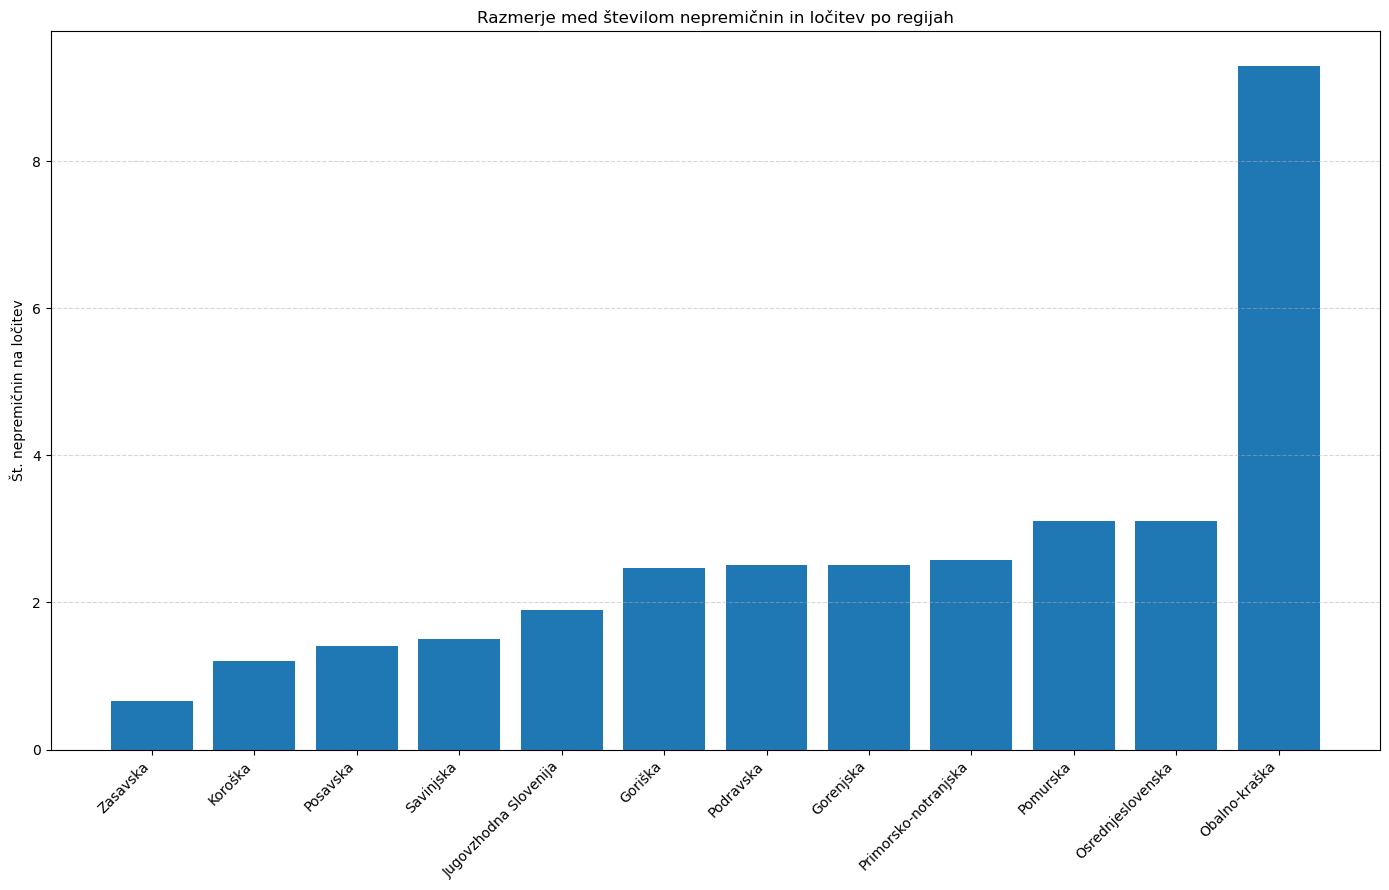

In [5]:
plt.figure(figsize=(14, 9))
plt.bar(regije, razmerja)
plt.xticks(rotation=45, ha='right')
plt.ylabel("Št. nepremičnin na ločitev")
plt.title("Razmerje med številom nepremičnin in ločitev po regijah")
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()